# Predicting the future variance of HSI

# Method

Predict the value for t using data t-30 to t-1. Then calculate Variance

Importing dependency

In [2]:
# data analysis
import numpy as np
import pandas
import math
#data visulization
import matplotlib.pyplot as plt
#building the network
from pandas import Series , DataFrame, Panel
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import metrics

Using TensorFlow backend.


Loading the dataset, as well as splitting up the data into traning and testing using a 67% split

In [13]:
# load the dataset
dataframe = pandas.read_csv('C:\\Users\\tcheng\\Documents\HSI1.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [17]:
train_size, test_size

(131, 65)

As it show, we have 131 Training Sample, and 65 Testing Sample
# creating the dataset

We must create a moving window for our dataset.
Our training X must contain 29 value T-30 to T-1. And our corresponding Y will be the actual value at T

In [9]:
# convert an array of values into a dataset matrix

np.random.seed(7)
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)


In [11]:
look_back = 29#we want data from T-30 to T-1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

Taking a look at our how dataset look like (first 3 value)

In [21]:
trainX[:3,:]

array([[ 18185.58984375,  18259.02929688,  18520.52929688,  18678.2890625 ,
         18502.33984375,  18953.63085938,  18872.56054688,  19026.51953125,
         18808.40039062,  19233.93945312,  19427.81054688,  19416.66992188,
         19518.84960938,  19265.0703125 ,  18995.13085938,  18897.44921875,
         18981.83984375,  19176.94921875,  19025.26953125,  19441.4609375 ,
         19735.52929688,  19709.75      ,  19809.13085938,  19800.640625  ,
         19428.08984375,  19396.359375  ,  19419.86914062,  19025.109375  ,
         19092.63085938],
       [ 18259.02929688,  18520.52929688,  18678.2890625 ,  18502.33984375,
         18953.63085938,  18872.56054688,  19026.51953125,  18808.40039062,
         19233.93945312,  19427.81054688,  19416.66992188,  19518.84960938,
         19265.0703125 ,  18995.13085938,  18897.44921875,  18981.83984375,
         19176.94921875,  19025.26953125,  19441.4609375 ,  19735.52929688,
         19709.75      ,  19809.13085938,  19800.640625  ,  19

In [23]:
trainY[:3]

array([ 19121.33984375,  19455.33007812,  19239.88085938], dtype=float32)

Building our model. We will use a network of 29->[30]->[12]->1
Our network is composed of 4 layer.  
A input layer of 29 neuron,  
2 hidden layer of 30 and 12 neuron  
as well as 1 final output laying outputting a single value of our prediciton.  

In [25]:
model = Sequential()
model.add(Dense(30,input_dim=look_back, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1,activation='linear'))


Here we will be using mean squared error as our cost function. And adam as our optimzer (a gradient descent learning)

In [27]:
model.compile(loss='mean_squared_error', optimizer='adam')

# Running the model

We will be ssing batch size of 2 each and 200 epochs.   
(epochs = the amount of complete iteration )

In [28]:
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
0s - loss: 23691264.9895
Epoch 2/200
0s - loss: 461559.7178
Epoch 3/200
0s - loss: 316347.9560
Epoch 4/200
0s - loss: 327013.2438
Epoch 5/200
0s - loss: 342255.4940
Epoch 6/200
0s - loss: 322230.5787
Epoch 7/200
0s - loss: 527762.1800
Epoch 8/200
0s - loss: 440309.8441
Epoch 9/200
0s - loss: 347743.7016
Epoch 10/200
0s - loss: 331249.5938
Epoch 11/200
0s - loss: 416458.6180
Epoch 12/200
0s - loss: 332796.7822
Epoch 13/200
0s - loss: 287432.5825
Epoch 14/200
0s - loss: 512979.2754
Epoch 15/200
0s - loss: 422808.3031
Epoch 16/200
0s - loss: 380431.7570
Epoch 17/200
0s - loss: 419595.9161
Epoch 18/200
0s - loss: 453199.5777
Epoch 19/200
0s - loss: 315566.3548
Epoch 20/200
0s - loss: 270949.2346
Epoch 21/200
0s - loss: 319795.8790
Epoch 22/200
0s - loss: 395171.5574
Epoch 23/200
0s - loss: 331654.2359
Epoch 24/200
0s - loss: 333486.5602
Epoch 25/200
0s - loss: 305578.6242
Epoch 26/200
0s - loss: 344392.1087
Epoch 27/200
0s - loss: 275896.4160
Epoch 28/200
0s - loss: 475032.2525

# Evaluating our score to see how well we did

In [29]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


Train Score: 80067.39 MSE (282.96 RMSE)
Test Score: 143477.05 MSE (378.78 RMSE)


In [30]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

In [37]:
plt.show()

Finally, using our predicted value, we will calculate the variance using data From T-30 to T-1 and our predicted T

In [38]:

# plotting our base plot
f, axarr = plt.subplots(sharex=True,squeeze=False)
axarr = axarr.flatten()
axarr[0].plot(dataset , label = 'data')
axarr[0].plot(trainPredictPlot,label = 'training')
axarr[0].plot(testPredictPlot, label = 'testing')

#plt.plot(futurePredictPlot)
axarr[0].set_title('Prediction Line')

def rolling_window(a, window):
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)


In [39]:

#creating a new dataset for prediction
predictionX , PredictionY = create_dataset(dataset,look_back+1)
prestack1 ,prestack2  = predictionX, PredictionY
datatodate = prestack1
#taking the data of the last 30 day, then deleteing the last column
np.delete(prestack1,look_back,axis =1)
#varPrep = np.hstack((prestack1,prestack2))
#varPrep2 = np.hstack((prestack1,prestack3))

#making our prediction of the new column
prediction = model.predict(predictionX)


#calculating variance
value = np.hstack((prestack1,prediction))
var  = np.empty(len(dataset))
var  [:] = np.nan
var [look_back+1:]= np.var(value,axis = 1,)

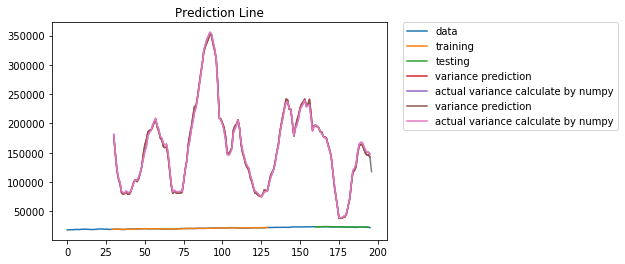

In [41]:
#calculating the real variance 
Rvar  = np.empty(len(dataset))
Rvar  [:] = np.nan
Rvar [look_back+1:]= np.var(prestack1, axis=1)


#plotting

#axarr[0].plot(np.var(varPrep,axis=1), label = 'variance prediction for training data')
#axarr[0].plot(np.var(varPrep2,axis=1),label = 'variance prediction for testing data')
axarr[0].plot( var,label = "variance prediction")
axarr[0].plot(Rvar, label = 'actual variance calculate by numpy')
axarr[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#Data = Series(dataset, index = dates)
#Series.rolling(Data,window=3,center=False).mean().plot(style='b--')
#Series.rolling(Data,window=3,center=False).var().plot(style='r--')
#Data.plot(style='k'


Pvar = np.empty(len(dataset))
Pvar[:]=np.nan
Pvar[-1] = var[-1]
Pvar= np.append(Pvar,np.var(np.append(dataset[-29:-1],model.predict(dataset[-30:-1].T))))

axarr[0].plot(Pvar)
#axarr[1].plot(error)
#axarr[1].set_title('Error ')
#axarr[1].axhline(0, color='black')
plt.show()

# The Entire Code is availble below:

131 65
Epoch 1/200
0s - loss: 20245329.5972
Epoch 2/200
0s - loss: 374464.6488
Epoch 3/200
0s - loss: 264033.7337
Epoch 4/200
0s - loss: 372805.4724
Epoch 5/200
0s - loss: 282565.4492
Epoch 6/200
0s - loss: 320115.9123
Epoch 7/200
0s - loss: 313731.8684
Epoch 8/200
0s - loss: 282828.8572
Epoch 9/200
0s - loss: 360375.1743
Epoch 10/200
0s - loss: 356799.6563
Epoch 11/200
0s - loss: 313445.2819
Epoch 12/200
0s - loss: 342645.0982
Epoch 13/200
0s - loss: 329417.0710
Epoch 14/200
0s - loss: 410035.2839
Epoch 15/200
0s - loss: 409741.0223
Epoch 16/200
0s - loss: 304140.0261
Epoch 17/200
0s - loss: 479457.7771
Epoch 18/200
0s - loss: 309393.5499
Epoch 19/200
0s - loss: 355183.0043
Epoch 20/200
0s - loss: 363788.5264
Epoch 21/200
0s - loss: 364634.6234
Epoch 22/200
0s - loss: 455430.8947
Epoch 23/200
0s - loss: 370157.5955
Epoch 24/200
0s - loss: 463085.8650
Epoch 25/200
0s - loss: 558415.8044
Epoch 26/200
0s - loss: 389131.7010
Epoch 27/200
0s - loss: 280204.2032
Epoch 28/200
0s - loss: 2528

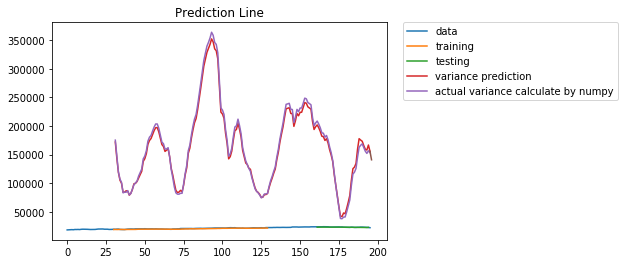

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import pandas
import math

from pandas import Series , DataFrame, Panel
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import metrics

np.random.seed(7)
# load the dataset
dataframe = pandas.read_csv('C:\\Users\\tcheng\\Documents\HSI1.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)


look_back = 30
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


model = Sequential()
model.add(Dense(30,input_dim=look_back, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1,activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))



trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

f, axarr = plt.subplots(sharex=True,squeeze=False)

axarr = axarr.flatten()


axarr[0].plot(dataset , label = 'data')
axarr[0].plot(trainPredictPlot,label = 'training')
axarr[0].plot(testPredictPlot, label = 'testing')


#plt.plot(futurePredictPlot)
axarr[0].set_title('Prediction Line')

def rolling_window(a, window):
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)



predictionX , PredictionY = create_dataset(dataset,look_back)
prestack1 ,prestack2  = predictionX, PredictionY
datatodate = prestack1
np.delete(prestack1,look_back-1,axis =1)

#varPrep = np.hstack((prestack1,prestack2))
#varPrep2 = np.hstack((prestack1,prestack3))
prediction = model.predict(predictionX)

value = np.hstack((prestack1,prediction))
var  = np.empty(len(dataset))
var  [:] = np.nan
var [look_back+1:]= np.var(value,axis = 1,)

Rvar  = np.empty(len(dataset))
Rvar  [:] = np.nan
Rvar [look_back+1:]= np.var(prestack1, axis=1)




#axarr[0].plot(np.var(varPrep,axis=1), label = 'variance prediction for training data')
#axarr[0].plot(np.var(varPrep2,axis=1),label = 'variance prediction for testing data')
axarr[0].plot( var,label = "variance prediction")
axarr[0].plot(Rvar, label = 'actual variance calculate by numpy')
axarr[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#Data = Series(dataset, index = dates)
#Series.rolling(Data,window=3,center=False).mean().plot(style='b--')
#Series.rolling(Data,window=3,center=False).var().plot(style='r--')
#Data.plot(style='k'


Pvar = np.empty(len(dataset))
Pvar[:]=np.nan
Pvar[-1] = var[-1]
Pvar= np.append(Pvar,np.var(np.append(dataset[-30:-1],model.predict(dataset[-31:-1].T))))

axarr[0].plot(Pvar)
#axarr[1].plot(error)
#axarr[1].set_title('Error ')
#axarr[1].axhline(0, color='black')
plt.show()
